# import the libraries

In [22]:
import ee
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Authentication and Initialization 
  - Before you can make requests to Earth Engine through a client library, you must authenticate 

In [24]:
ee.Authenticate()

True

In [25]:
ee.Initialize()

 # Getting statistics of the points

In [27]:
#dowenload the image collection and filter it with date and get the median image
dataset = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2').filterDate('2022-09-01', '2022-09-30').median()  

In [28]:
# Define the points (coordinates) we want to make analysis on it
points = [
    [30.488472, 31.173472],
    [30.524722, 31.151861],
    [30.566028, 31.130972],
    [30.647556, 31.077806],
    [30.734028, 31.028500],
    [30.807556, 31.013361],
    [30.790639, 30.965194],
    [30.801278, 30.913278],
    [30.815306, 30.904389],
    [30.848333, 30.901222],
    [30.876917, 30.873500],
    [30.899056, 30.856250],
    [30.930333, 30.835639],
    [30.961583, 30.783083],
    [31.003111, 30.759333],
    [31.043556, 30.735694],
    [31.085667, 30.727861],
    [31.101222, 30.683639],
    [31.143611, 30.645361],
    [31.182500, 30.600361],
    [31.207500,30.569444],
    [31.224444,30.531583],
    [31.264361,30.518389],
    [31.311250,30.515528],
    [31.344417,30.482861],
    [30.851444,31.030083],
    [30.894389,31.024361],
    [30.893667,31.024667],
    [30.931611,30.990083],
    [30.980056,30.970417],
    [31.031639,30.961556],
    [31.085750,30.965417],
    [31.142111,30.968861],
    [31.214722,30.984111],
    [31.268806,30.990528],
    [31.261778,31.049611],
    [31.278194,31.093417],
    [31.328944,31.132139],
    [31.399000,31.125000],
    [31.471750,31.126861],
    [31.526444,31.140306],
    [31.565361,31.081889],
    [31.586472,31.052500],
    [31.412167,30.451000],
    [31.340417,30.366278],
    [31.205000,30.091444],
    [31.167278,30.069167],
    [31.128167,30.102194],
    [31.120861,30.164528],
    [31.108250,30.211944],
    [31.086417,30.294417],
    [31.069194,30.359806],
    [31.013250,30.473583],
]


In [29]:
# Create a feature collection from the points
features = ee.FeatureCollection([ee.Feature(ee.Geometry.Point(coord)) for coord in points])

In [30]:
# Function to get statistics for each point
def get_statistics(feature):
    point = feature.geometry()
    # Calculate the median for each band in the median image
    stats = dataset.reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=point,
        scale=30  # resolution in meters
    )
    return feature.set(stats)

In [31]:
# Apply the function to each feature(point) in the features collection
stats_features = features.map(get_statistics)

# Prepare to create the statistics data table to store the result

In [33]:
# identify the tabel header
data_table = {
    'longitude': [],
    'latitude': [],
    'SR_B1': [],
    'SR_B2': [],
    'SR_B3': [],
    'SR_B4': [],
    'SR_B5': [],
    'SR_B6': [],
    'SR_B7': []
}

In [34]:
# evaluate the data
stats_features.getInfo().get('features', [])
for f in stats_features.getInfo().get('features', []):
    coords = f['geometry']['coordinates']
    properties = f['properties']
    
    data_table['longitude'].append(coords[0])
    data_table['latitude'].append(coords[1])
    data_table['SR_B1'].append(properties.get('SR_B1'))
    data_table['SR_B2'].append(properties.get('SR_B2'))
    data_table['SR_B3'].append(properties.get('SR_B3'))
    data_table['SR_B4'].append(properties.get('SR_B4'))
    data_table['SR_B5'].append(properties.get('SR_B5'))
    data_table['SR_B6'].append(properties.get('SR_B6'))
    data_table['SR_B7'].append(properties.get('SR_B7'))
    

In [35]:
# Create a DataFrame to display statistics
df = pd.DataFrame(data_table)

# Print the DataFrame
print(df)
# save result to csv file
csv_filename = 'land9_statistics_results.csv'
df.to_csv(csv_filename, index=False)
print(f'Results saved to {csv_filename}')

    longitude   latitude    SR_B1    SR_B2    SR_B3    SR_B4    SR_B5  \
0   30.488472  31.173472   8650.5   9009.5  10024.5  10146.5  15470.0   
1   30.524722  31.151861   8013.5   8290.0   9328.0   9051.0  16040.0   
2   30.566028  31.130972   8358.5   8715.5   9803.0   9831.5  15446.5   
3   30.647556  31.077806   8746.5   9189.0  10220.0  10775.0  16168.5   
4   30.734028  31.028500   8013.5   8367.0   9608.0   9206.5  17916.5   
5   30.807556  31.013361   8337.5   8846.5   9854.5  10047.0  14041.0   
6   30.790639  30.965194   8425.0   8779.5   9617.0   9734.0  15041.5   
7   30.801278  30.913278  13400.5  14098.5  15699.5  16159.5  20067.5   
8   30.815306  30.904389   8631.0   9057.5   9857.0  10420.0  12576.5   
9   30.848333  30.901222   8187.5   8474.0   9510.5   9359.5  17257.5   
10  30.876917  30.873500  10003.0  10417.0  11619.5  12501.0  14581.5   
11  30.899056  30.856250   8698.0   9047.5   9895.5  10234.5  14260.5   
12  30.930333  30.835639   8207.0   8586.5  10018.0

# calculate the correlation between bands and HM

In [37]:
# read data and display it 
data=pd.read_csv('land9_statistics_results.csv')
data.head()


,longitude,latitude,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,30.488472,31.173472,8650.5,9009.5,10024.5,10146.5,15470.0,13216.5,11122.0
1,30.524722,31.151861,8013.5,8290.0,9328.0,9051.0,16040.0,11186.5,9418.0
2,30.566028,31.130972,8358.5,8715.5,9803.0,9831.5,15446.5,12883.5,10696.5
3,30.647556,31.077806,8746.5,9189.0,10220.0,10775.0,16168.5,15152.0,12429.5
4,30.734028,31.028500,8013.5,8367.0,9608.0,9206.5,17916.5,11279.0,9290.5


In [38]:
# add the HM concentration column to df
data['HM']=[
384.9,
318.3,
342.4,
440.8,
397.6,
380.4,
381.2,
414.5,
333.9,
362.8,
366.9,
407.6,
373.5,
382.0,
385.6,
356.8,
293.4,
332.1,
363.2,
429.9,
378.6,
419.2,
399.6,
189.0,
427.1,
429.2,
392.4,
387.6,
437.0,
444.5,
410.6,
453.4,
409.2,
448.0,
376.7,
395.0,
397.7,
347.8,
328.7,
292.1,
222.7,
152.0,
141.5,
287.4,
340.4,
318.1,
309.6,
325.8,
246.8,
231.3,
326.1,
276.7,
340.9]

In [39]:
# split the target(HM) and get correlation between it and features(bands)
target='HM'
#pearson correlation
corr=data.corr()[target]
print(corr)

longitude   -0.457153
latitude     0.234361
SR_B1        0.021815
SR_B2        0.051230
SR_B3        0.105552
SR_B4        0.086310
SR_B5       -0.006909
SR_B6       -0.083402
SR_B7       -0.035892
HM           1.000000
Name: HM, dtype: float64


In [40]:
# get spearman correlation
corr1=data.corr(method='spearman')[target]
print(corr1)

longitude   -0.338978
latitude     0.209160
SR_B1       -0.062331
SR_B2       -0.022416
SR_B3        0.075391
SR_B4        0.040639
SR_B5        0.125141
SR_B6       -0.033624
SR_B7       -0.090711
HM           1.000000
Name: HM, dtype: float64


In [41]:
#kendall corr
corr2=data.corr(method='kendall')[target]
print(corr2)

longitude   -0.238026
latitude     0.166909
SR_B1       -0.043573
SR_B2       -0.015965
SR_B3        0.047896
SR_B4        0.020319
SR_B5        0.076923
SR_B6       -0.030479
SR_B7       -0.069666
HM           1.000000
Name: HM, dtype: float64


In [42]:
# numpy correlation
x=data.drop(columns='HM')
y=data['HM']
# Calculate the correlation only if they have the same number of rows
if x.shape[0] == y.shape[0]:
    correlation_matrix = np.corrcoef(x.T, y)  # Transpose x to have features as rows
    print("Correlation matrix:\n", correlation_matrix)
else:
    print("Shape mismatch: Cannot calculate correlation.")

Correlation matrix:
 [[ 1.         -0.23913746  0.02647241  0.01353241  0.00845582  0.0383331
   0.20832245  0.26701107  0.14877681 -0.4571532 ]
 [-0.23913746  1.         -0.19370493 -0.15849568 -0.06688187 -0.14145394
   0.23381842 -0.2300789  -0.30642734  0.2343615 ]
 [ 0.02647241 -0.19370493  1.          0.99380662  0.92442083  0.94143804
   0.12323703  0.82616128  0.88047077  0.02181495]
 [ 0.01353241 -0.15849568  0.99380662  1.          0.95243812  0.96518043
   0.15205451  0.83767313  0.8881235   0.05122962]
 [ 0.00845582 -0.06688187  0.92442083  0.95243812  1.          0.95760034
   0.36187716  0.85520992  0.8489157   0.10555203]
 [ 0.0383331  -0.14145394  0.94143804  0.96518043  0.95760034  1.
   0.13450313  0.87185857  0.9364236   0.08631013]
 [ 0.20832245  0.23381842  0.12323703  0.15205451  0.36187716  0.13450313
   1.          0.32899753  0.01800742 -0.00690927]
 [ 0.26701107 -0.2300789   0.82616128  0.83767313  0.85520992  0.87185857
   0.32899753  1.          0.92576007 -

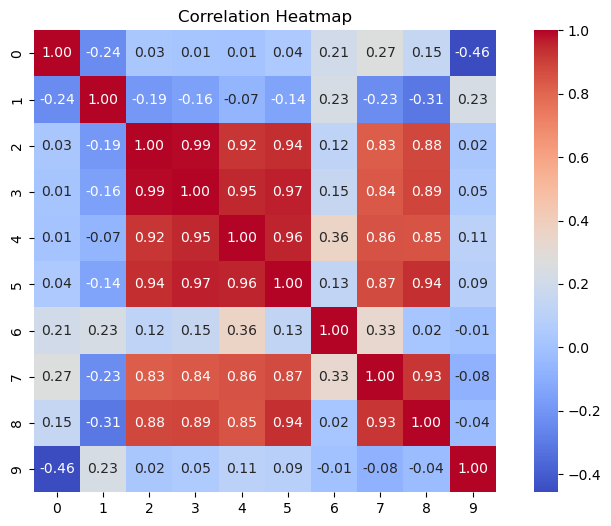

In [43]:
# Visualize the correlation using a heatmap to numpy correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()